<a href="https://colab.research.google.com/github/ushafromwork/DeepLearning/blob/Deep-Learning-Projects/DL_Project2_MNIST_Digit_classification_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification using Deep Learning(Neural Network)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST data from keras.datasets**

since we are using MNIST, we don't have to separate train,test data.it's already processed

https://keras.io/api/datasets/mnist/

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=6000 images

Test Data=10,000 images

Image dimension==28 X 28

Grayscale image---1 channel

In [5]:
#printing the 10th image

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

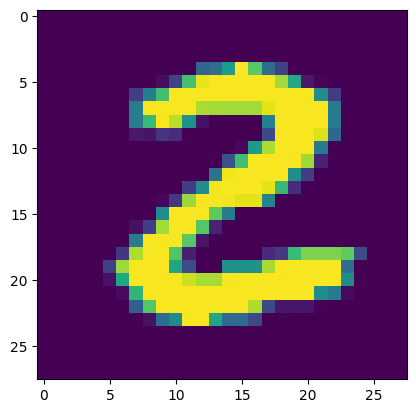

2


In [9]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#print the corresponding y_train label
print(y_train[25])

Image labels

In [10]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [11]:
#Unique values in y_train
print(np.unique(y_train))

#Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this datasets,if not,we have to resize the all the images to common dimension

In [12]:
#scaling the images
x_train = x_train/255
x_test = x_test/255

In [13]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network
cnn-convolutional neural network
rnn-recurrent neural network

In [14]:
#setting up the layers of the neural neetwork
model=keras.Sequential([

                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')]) #no.of classes in output layer(0,1,2,3,4,5,6,7,8,9--y_test unique values)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training Neural Network

In [16]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8438 - loss: 0.5608 - val_accuracy: 0.9603 - val_loss: 0.1507
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9489 - loss: 0.1744 - val_accuracy: 0.9657 - val_loss: 0.1189
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9634 - loss: 0.1264 - val_accuracy: 0.9700 - val_loss: 0.1034
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9705 - loss: 0.1003 - val_accuracy: 0.9720 - val_loss: 0.0968
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9753 - loss: 0.0829 - val_accuracy: 0.9720 - val_loss: 0.0955
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9795 - loss: 0.0699 - val_accuracy: 0.9718 - val_loss: 0.0955
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9826 - loss: 0.0598 - val_accuracy: 0.9737 - val_loss: 0.0951
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0512 - 

Training dat accuracy==95.96%

In [17]:
#Accuracy on Test data
loss,accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9668 - loss: 0.1179


Test Data accuracy=96.68%

In [18]:
print(x_test.shape)

(10000, 28, 28)


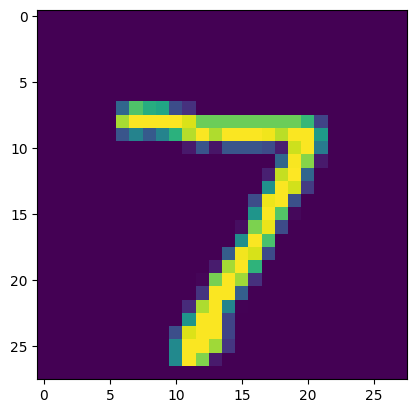

In [19]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [20]:
print(y_test[0])

7


In [21]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
print(y_pred.shape)

(10000, 10)


In [23]:
print(y_pred[0]) #Imodel.predict gives probability of getting each class of that data point

[2.4610371e-03 2.7126185e-05 2.1180831e-02 9.5744091e-01 6.1862961e-06
 1.0620838e-04 1.2570962e-10 9.9996150e-01 1.8634973e-02 7.4785143e-01]


In [24]:
#converting the prediction probabilities to class label
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [25]:
#converting the prediction probabilities to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ---->True Labels

y_pred_labels------>predicted labels

**Building Confusion Matrix**

In [26]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 958    0    2    0    0    3    6    5    2    4]
 [   0 1119    3    1    1    2    3    0    6    0]
 [   4    3  989   11    0    0    5   10   10    0]
 [   0    0    0  987    0    5    0    5    9    4]
 [   0    0    2    2  940    2    5    6    3   22]
 [   3    1    1   19    1  854    6    0    4    3]
 [   2    3    1    1    3    8  930    4    6    0]
 [   1    2    8    6    1    0    0  998    3    9]
 [   3    0    1    8    3    4    1    4  942    8]
 [   2    3    0    7    6    3    1    4    1  982]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

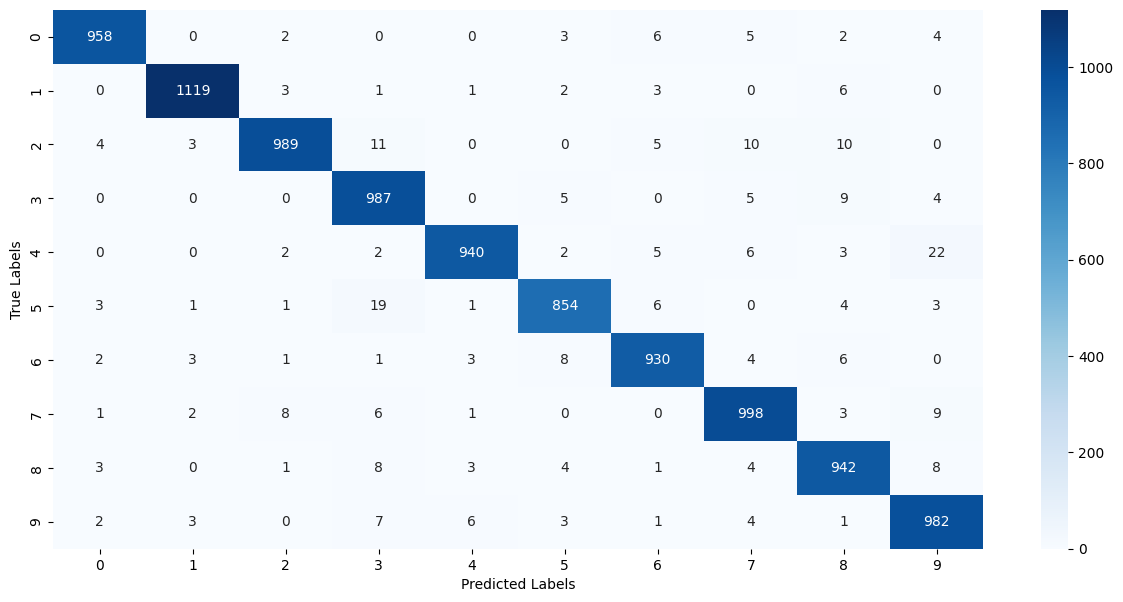

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building the Predictive system**

In [29]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [ ]:
print(input_image)

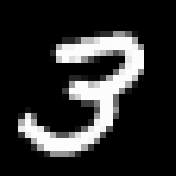

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(176, 176, 3)

In [33]:
grayscale_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [35]:
print(grayscale_image.shape)

(176, 176)


In [36]:
input_image_resize=cv2.resize(grayscale_image,(28,28))

In [37]:
print(input_image_resize.shape)

(28, 28)


In [38]:
cv2_imshow(input_image_resize)

In [39]:
input_image_resize=input_image_resize/255

In [40]:
image_reshape=np.reshape(input_image_resize,[1,28,28])

In [41]:
input_prediction=model.predict(image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[2.4422128e-11 1.1128939e-06 1.9583135e-06 9.9999905e-01 6.2044765e-09
  1.0145392e-03 4.4745108e-16 1.2977774e-03 1.3293437e-02 1.2921853e-01]]


In [43]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


**Predictive system**

Path of the image to be predicted/content/MNIST_digit.png


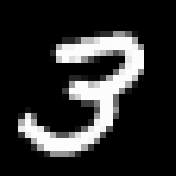

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Handwritten Digit Recognized as: 3


In [45]:
input_image_path=input('Path of the image to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale_image,(28,28))

input_image_resize=input_image_resize/255

image_reshape=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshape)

input_pred_label=np.argmax(input_prediction)

print('The Handwritten Digit Recognized as:',input_pred_label)

